<img src="ohio_state_gu_logos.PNG" width="400" align="left"/>

<a id='section0'></a>

<br>

## _Ocean modelling workshop 2020_
<br> 


<ol>
    <li>Overview</li><br>
        <ol>
            <li><a href='#section1'>Input data</a></li><br>
            <li><a href='#section2'>Basic model operation</a></li><br>        
            <li><a href='#section3'>Model output </a></li><br>
            <li><a href='#section4'>Preprocessing output</a></li><br>
        </ol>
    <li>Data pre-processing</li><br>
        <ol>
            <li><a href='#section5'>Currents</a></li><br>
            <li><a href='#section6'>Winds</a></li><br>        
            <li><a href='#section7'>Land/Ocean Distribution, Departure Points, Distance Grid (Grid directory) </a></li><br>
        </ol>   
    <li>The simulation</li><br>
        <ol>
            <li><a href='#section8'>Generating the trajectories</a></li><br>
            <li><a href='#section9'>Visualisting the results</a></li><br>        
        </ol>

<h3>Import all functions and python libraries needed</h3>

In [1]:
from scipy.io import loadmat, savemat
import numpy as np
import folium
import pickle
from utils import *
from tqdm import tqdm
from scipy.interpolate import RegularGridInterpolator
from netCDF4 import Dataset
import datetime
import multiprocessing as mp
import matplotlib.pyplot as plt

%run functions.ipynb

<h2>1. Overview</h2>

<a id='section1'></a>
## 1A. Input data
The model requires three types of input data: currents, winds and land/ocean distribution. All three must be homogenously distributed in space and time. This means gridded data with constant delta lat and delta lon and available at constant intervals.  In our example, the input land/ocean distribution is a 2D matrix with wind and current organized as 3D matrices with time being the third dimension. To simplify computations, all input data are interpolated into the same spatial and temporal resolution prior to their use in the simulation. This preparation will take place in the next couple of cells


<a id='section2'></a>
## 1B. Basic model operation
The model traces the displacement over time of “vessels” that move under the influence of winds and currents.
Prior to the start of the simulation at least one point in space must be selected and the simulation consists 
of calculating and recording vessel change in position from this initial “departure point”. Usually more than
one departure point is selected. Departure could be defined at any lat and lon combination within the domain
of the model. Most times the model has been used, and this includes this example, departure points were selected 
at the center of data bins adjacent to land and/or center of data bins adjacent to bins adjacent to land. 
The model calculates and records vessel displacement until: a) the simulation ends, that is, the time limit set
    at the start of the simulation is reached; b) the vessel moves into a land bin or within a pre-determined 
    distance to a land bin or; c) the vessel moves out of the model domain.

<a id='section3'></a>
## 1C. Model output
The model traces the displacement over time of “vessels” that move under the influence of winds and currents.
Prior to the start of the simulation at least one point in space must be selected and the simulation consists 
of calculating and recording vessel change in position from this initial “departure point”. Usually more than
one departure point is selected. Departure could be defined at any lat and lon combination within the domain
of the model. Most times the model has been used, and this includes this example, departure points were selected 
at the center of data bins adjacent to land and/or center of data bins adjacent to bins adjacent to land. 
The model calculates and records vessel displacement until: a) the simulation ends, that is, the time limit set
    at the start of the simulation is reached; b) the vessel moves into a land bin or within a pre-determined 
    distance to a land bin or; c) the vessel moves out of the model domain.

<a id='section4'></a>
<h3>1D. Processing output</h3>
<p>This is not done by the model and how the output is processed will depend on the questions being 
asked from the modeled data. Some basic information is usually required by most projects. This includes: 
    fraction of vessels departing from area A that reach some target area B and the average, maximum and
    minimum duration of these trips and how date/season of voyage start influences voyage success.</p>

<h2>2. Pre-processing</h2>
<p>All input data needs some level of pre-processing before being ready for use by the model. Also, 
files containing information such as location of departure points or grid points in distance coordinates
need to be generated. This is described below by explaining what different scripts (.m files) do, 
including required input files as well as output files generated for a particular .m file being described.
Note that many output files become input files in subsequent steps.</p>


<a id='section5'></a>
<h3>2A. Currents</h3>
<p>Surface currents come from the ECMWF Global Ocean Physics Reanalysis ORAP5.0, originally available as
5-day mean values with approximate 0.25˚x0.25˚ spatial resolution covering the period between 1979-2013 
(see the available catalogue and user manual for more info). This product is provided freely by ECMWF as
files containing one year of data that are close to, but not in a constant dx-dy projection. In a step not
discussed here the original ECMWF files were interpolated into daily values. </p>

In [2]:
#put code here
#in example using already processed files. 
#hopefully we will get all data as netcdf-files, already interpolated and ready to be put on the server
#and accessed directly here. 

<a id='section6'></a>
<h3>2B. Land/Ocean Distribution, Departure Points, Distance Grid (Grid directory)</h3>
<p>Surface currents come from the ECMWF Global Ocean Physics Reanalysis ORAP5.0, originally available as
5-day mean values with approximate 0.25˚x0.25˚ spatial resolution covering the period between 1979-2013 
(see the available catalogue and user manual for more info). This product is provided freely by ECMWF as
files containing one year of data that are close to, but not in a constant dx-dy projection. In a step not
discussed here the original ECMWF files were interpolated into daily values. </p>


In [3]:
#put code here
#in example using already processed files. 
#hopefully we will get all data as netcdf-files, already interpolated and ready to be put on the server
#and accessed directly here. 

<a id='section7'></a>
<h3>3A. Generating the trajectories</h3>
<p>Information here </p>


<h3>Loading the data</h3>
probably not needed once done, the data would be variables generated in pre-processing cells</p>

<h3>Select vessel type</h3>
<p>
  1) <b>Commercial Fishing Vessels</b>.  Include vessels from 45 to 100
     feet long designed for fishing or shell fishing in coastal and
     ocean waters.All have some form of deckhouse and an open area 
     from which nets can lines are worked. 
     Sl=0.04; Yt=0; Da=48;    Error, knosts=25.</li>

  2) <b>Skiffs</b>.  Open boats less than 20 ft long.
     USE - V-hull standard 
     Sl=0.03; Yt=0.08; Da=15; Error, knosts=0.10

  3) <b>Mono-hull Sailing Vessel</b>.  It is assumed that all targets 
     in this category are adrift; therefore sails are down or 
     missing and the crew is unable to maneuver the vessel at all.
     USE -  Fin Keel.
     Sl=0.04; Yt=0; Da=48; Error, knosts=0.25

  4) <b>Rustic raft with sail</b>. 
     USE -  sail
     Sl=0.08; Yt=-0.17; Da=33; Error, knosts=0.15

  5) <b>Rustic raft without sail</b>
     USE - no sail  
      Sl=0.015; Yt=0.17; Da=17; Error, knosts=0.05
  
  6) <b>Sea kayak</b>
     USE 1 person
      Sl=0.011; Yt=-0.24; Da=15; Error, knosts=0.10
  
Levison et al. parameters. Wind component of vessel movement
is in the same direction of wind with speeds given 
by their Table 2, page 19 of the book. 
</p>

In [14]:
# The vessel USCG type
craft_type       = 5

# The interval in days to launch new vessels
day_frequency    = 5

# Number of days to step when simulating vessel trajectories
max_days_to_run  = 60
n_months         = 24

# Days during the year to simulate
n_days           = n_months*30-max_days_to_run

# Time resolution in seconds when calculating vessel trajectory speed
dt               = 60 * 60 * 24

# Number of vessels to send from coast
n_vessels = 10

In [15]:

days = np.arange(0, n_days, day_frequency)
start_date = datetime.date.fromisoformat('1979-01-01')
time_delta = datetime.timedelta(days=day_frequency)

In [16]:

# Load longitude and latitude data for region
longitude = loadmat('Atl_lon.mat')['Atl_lon'].squeeze()+360
latitude = loadmat('Atl_lat.mat')['Atl_lat'].squeeze()

# Load corresponding land-sea mask
mask = np.moveaxis(np.flip(loadmat('Mask')['Mask'][:,:,0], axis=0), 0, 1)

# Select region bounding box
lat_min = 20
lat_max = 45
lon_min = -30+360
lon_max = -5+360

# Correct region bounding box based on mask border
lat_min = np.min(latitude) if np.min(latitude) > lat_min else lat_min
lat_max = np.max(latitude) if np.max(latitude) < lat_max else lat_max
lon_min = np.min(longitude) if np.min(longitude) > lon_min else lon_min
lon_max = np.max(longitude) if np.max(longitude) < lon_max else lon_max

bbox             = (lon_min, lat_min, lon_max, lat_max)

# Calculate masks for longitude and latitude, used to crop the map (mostly used on the full data)
lon_mask, lat_mask = get_bbox_mask(longitude, latitude, bbox)

# Extract relevant area of the longitude and latitudes
lon = longitude[lon_mask]
lat = latitude[lat_mask]


In [17]:
# Automatically calculate the departure points along a coast of a 
# given mask and region
departure_points = get_departure_points(mask[lon_mask][:, lat_mask], lon, lat)

# Randomly choose a subset of these
random_launch_sites = np.random.choice(departure_points.shape[0], n_vessels)
departure_points = departure_points[random_launch_sites, :]

In [18]:
# Load the current data
all_dates_current_x, all_dates_current_y = load_current_data(1979)

# Load the wind data
all_dates_wind_x, all_dates_wind_y = load_wind_data(1979)

all_dates_current_x = all_dates_current_x[:, lon_mask][:,:, lat_mask]
all_dates_current_y = all_dates_current_y[:, lon_mask][:,:, lat_mask]

all_dates_wind_x = all_dates_wind_x[:, lon_mask][:,:, lat_mask]
all_dates_wind_y = all_dates_wind_y[:, lon_mask][:,:, lat_mask]

## The voyaging starts

The model will conduct and store voyages in an annual basis, hence the
annual loop below. Remember that the input data is organized in annual
files. Note that to full use of data, and as long as  simulations don't last
more than 1 year, the subset of wind and current values to be used will
come from a variable containg 2 years of data.
This allows, for example, the conduction of 60 (or 1) day voyages initiated
on Dec 31 of year yr. For simulations with drifts that last from 366
to 730 days (366=< st <=730) the subset would have to include 3 years and so forth.

the years used in the simulation can be adjusted by change the initial
and final values of yr in the loop below. Notice that as written,
yr=1979:1979, only one year of voyages will be simulated. To run simulations
for example, from 1995 to 1999 the line would read
for yr=1995:199. Note that since data ends in 2013, simulations can only 
start up to 2012

In [19]:


# lon, lat, area   = get_local_coordinates(bbox, mask)
# departure_points = get_departure_points(bbox, mask)

# Read data and transform to 
# data = Dataset("data/wind.nc", "r", format="NETCDF4")
# mask_data = Dataset("data/lsm.nc", "r", format="NETCDF4")
# mask = np.array(mask_data.variables["lsm"]).squeeze() > 0.5

# longitude = np.array(data.variables["longitude"])
# latitude  = np.array(data.variables["latitude"])

    
# Extract bounding box and transform to longitude, latitude masks

# OLD DATA

# Mask the data
# u = np.array(data.variables["u10"])#[days, :, :]
# v = np.array(data.variables["u10"])#[days, :, :]
# u[:, mask] = np.nan
# v[:, mask] = np.nan

# Extract relevant area of wind and currents
# all_dates_wind_x = np.repeat(np.flip(u[:, lat_mask][:, :, lon_mask], axis=2), factor, axis=0)
# all_dates_wind_y = np.repeat(np.flip(v[:, lat_mask][:, :, lon_mask], axis=2), factor, axis=0)

# all_dates_current_x = 2*all_dates_wind_x  # Should obviously be changed
# all_dates_current_y = 2*all_dates_wind_y


# Defines the interpolation method
interpolate = lambda x, y: RegularGridInterpolator((np.arange(max_days_to_run), lon, lat), x[y:y+max_days_to_run, :, :], bounds_error=False, fill_value=np.nan)

# Fetch a year of data
time = np.arange(all_dates_current_x.shape[0])

all_results = {}
all_drifts  = []
date = start_date
for launch_day in tqdm(days):

    # Interpolate the current speeds for the current day
    current_in_x = interpolate(all_dates_current_x, launch_day) 
    current_in_y = interpolate(all_dates_current_y, launch_day) 
    
    # Interpolate the wind speeds for the current day
    wind_in_x = interpolate(all_dates_wind_x, launch_day) 
    wind_in_y = interpolate(all_dates_wind_y, launch_day) 

    # Send out a number of vessels every day (sigh)
    vessels  = [Vessel(np.array([x]), np.array([y]), craft=craft_type) for x, y in departure_points]
    options =  [(vessel, max_days_to_run, dt, launch_day, (current_in_x, current_in_y), (wind_in_x, wind_in_y)) for vessel in vessels]

    with mp.Pool(mp.cpu_count()) as p:

        results = p.starmap(simulate_vessel_trajectory, options)
        all_results[date.strftime("%Y-%m-%d")] = [x["trajectories"] for x in results]
        all_drifts.extend([x["drifts"] for x in results])

        # for vessel in vessels:
        #     results = simulate_vessel_trajectory(vessel, max_days_to_run, dt, launch_day, (current_in_x, current_in_y), (wind_in_x, wind_in_y))

    date += time_delta
    
save_to_GeoJSON(all_results, "GeoJSON/new_results.json")

100%|██████████| 120/120 [05:13<00:00,  2.62s/it]


In [20]:
import json

with open("GeoJSON/new_results.json", "r") as f:
    trajectories = json.load(f)

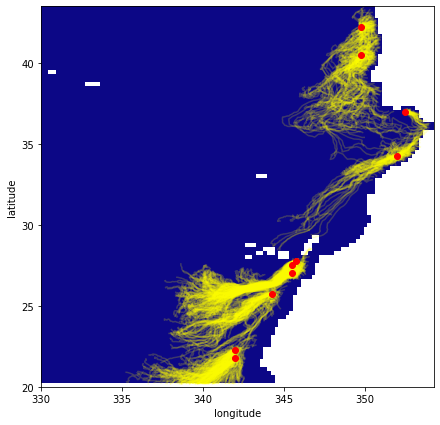

In [21]:
fig, ax = plt.subplots(figsize = (8,7))
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

ax.imshow(mask.T, extent=(lon_min, lon_max, lat_min, lat_max), cmap="plasma")

for idx in range(len(trajectories["features"])):
    X = trajectories["features"][idx]["geometry"]["coordinates"]
    X = np.array(X)

    # ax.plot(X[:,0], lat_max-X[:,1]+lat_min, color='g')
    ax.plot(X[:,0], X[:,1], color='yellow', alpha=0.2, zorder=1)
ax.scatter(departure_points[:,0], departure_points[:,1], c="r", marker="o", zorder=1000)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
plt.savefig("demo.jpg")
plt.show()


In [12]:
drifts = []

for x in all_drifts:
    drifts.extend(x)

drifts = np.array(drifts)


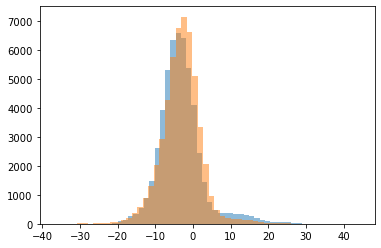

In [13]:
plt.hist(drifts[:,0], bins = 50, alpha=0.5)
plt.hist(drifts[:,1], bins = 50, alpha=0.5)
plt.show()

In [19]:
PX_1979 = loadmat('matlab/PX_1979.mat')['PX_1979']
PY_1979 = loadmat('matlab/PY_1979.mat')['PY_1979']
results = dist2vessels(PX_1979, PY_1979, 360-32, 20)
save_to_GeoJSON(results, "GeoJSON/matlab_results.json")


In [20]:
with open("GeoJSON/matlab_results.json", "r") as f:
    trajectories = json.load(f)

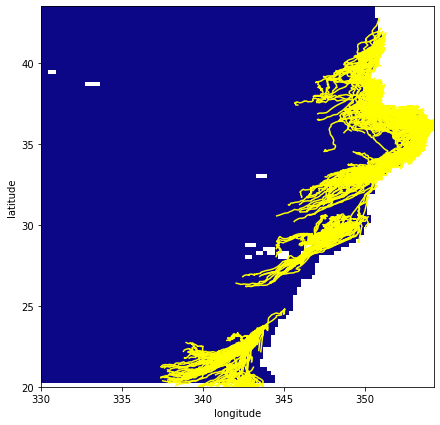

In [21]:
fig, ax = plt.subplots(figsize = (8,7))
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

ax.imshow(mask.T, extent=(lon_min, lon_max, lat_min, lat_max), cmap="plasma")

for idx in range(len(trajectories["features"])):
    X = trajectories["features"][idx]["geometry"]["coordinates"]
    X = np.array(X)

    # ax.plot(X[:,0], lat_max-X[:,1]+lat_min, color='g')
    ax.plot(X[:,0], X[:,1], color='yellow', alpha=1, zorder=1)
# ax.scatter(departure_points[:,0], departure_points[:,1], c="r", marker="o", zorder=1000)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
plt.savefig("demo.jpg")
plt.show()

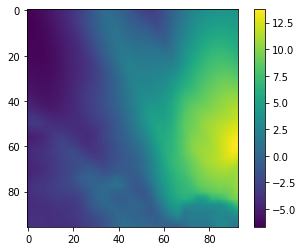

In [22]:
date  =2
wind = interpolate(all_dates_wind_x, date)
plt.imshow(all_dates_wind_x[date,:,:])
plt.colorbar()

In [23]:
xx, yy = np.meshgrid(lon,lat)

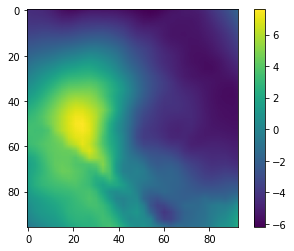

In [24]:
data = wind((date, xx,yy))
plt.imshow(data.T)
plt.colorbar()

In [17]:
PX_1979 = loadmat('PX_1979.mat')['PX_1979']

PY_1979 = loadmat('PY_1979.mat')['PY_1979']

#0 (location start vessel) to 59 (60 day journey max - start at 0)
day=0

#which departure point (out of 236)
dep_point=101
#73
#day 0 - 1477
#day 1 - 1480
#day 2 - 1484
#day 3 - 1491
#day 4 - 1490
#day 5 - 1491
print(PX_1979[day][dep_point])
#day 0 - 139
#day 1 - 135
#day 2 - 130
#day 3 - 122
#day 4 - 125
#day 5 - 127

#0, 1 or 2 för the last digit
#because three different attempst ? 
print(PY_1979[day][dep_point])




#each array lenght 73 because should be 73 different voyages per year (365/5=73)
#for the 73 different journes, where is the vessel on the first day (in distance coordinates)
#what is the second? lenght 3 (here!) - the different starting points.- the loop that was supposed to be the 
#lenght of dep_dist

[2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.18659898 2050.18659898 2050.18659898 2050.18659898 2050.18659898
 2050.

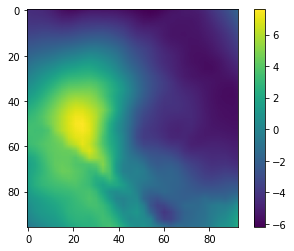

In [14]:
plt.imshow(all_dates_wind_x[4,:,:])
plt.colorbar()

In [ ]:
#calcualte from difference in lat/lon to distance - we need to do the other way around

x = [math.radians(st_lon-lon)*math.cos(math.radians(st_lat+lat)/2) for lat in fp_lat for lon in fp_lon]

y = [math.radians(st_lat-lat) for lat in fp_lat for lon in fp_lon]

distance=[math.sqrt((x[index]*x[index])+(y[index]*y[index])) * R for index in range(len(x))]

<h2>Map: show the study area</h2>

In [41]:
#Carnary domain 
domain=[[min(lat[0]), min(lon[0])], [max(lat[0]), min(lon[0])], [max(lat[0]), max(lon[0])],[min(lat[0]), max(lon[0])],[min(lat[0]), min(lon[0])]]

m = folium.Map(min_zoom=2)   

folium.PolyLine(domain).add_to(m) 

#zoom in on domain
m.fit_bounds([domain]) 

m

<h2>Map: draw up study area (in progress)</h2>
<p>Instead of writing the min/max bounds</p>

In [42]:
#created a python function rather than write out the whole code (see functions notbook)
draw_studyarea()

#would like to only make it possible to use the rectangle - or how hard would it be to allow for different shapes?
#no way to use predefined code to alter the selection bar (to the left).
#one to specify departure points - one map to specify arrival area (siccessful? - check if intersect)

#already dep_points now. can use these directly - or have to be starting from the center of the cell closest to them? 
#select from predefined dep bins? 

#also, here option to save single clicks: https://github.com/jupyter-widgets/ipyleaflet/issues/258


Map(center=[50, 354], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#0000FF', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0.2, 'clickable': True}}, 'geometry': {'type': 'Polygon', 'coordinates': [[[355.785381, 36.214141], [355.785381, 45.000544], [380.261258, 45.000544], [380.261258, 36.214141], [355.785381, 36.214141]]]}}


In [43]:
#Study area using the values above.
#about ipyleaflet coordinate system etc: https://github.com/jupyter-widgets/ipyleaflet/issues/280 
load_area = "study_area.txt"
with open(load_area, "rb") as f:
    list_coordinates= pickle.load(f)

#could put in as coordinate pairs instead - whatever is needed to define study area
lat=[]
lon=[]
for indices in range(len(list_coordinates)):
    
    #note -360 to get into lat/lon
    lon.append(list_coordinates[indices][0]-360)
    lat.append(list_coordinates[indices][1])
    
domain=[[min(lat), min(lon)], [max(lat), min(lon)], [max(lat), max(lon)],[min(lat), max(lon)],[min(lat), min(lon)]]

m = folium.Map(min_zoom=2)   

folium.PolyLine(domain).add_to(m) 

#zoom in on domain
m.fit_bounds([domain]) 

m

In [44]:
print(lon)
print(lat)

[-4.214619000000027, -4.214619000000027, 20.261257999999998, 20.261257999999998, -4.214619000000027]
[36.214141, 45.000544, 45.000544, 36.214141, 36.214141]


In [ ]:
#which points are close to the coast/bordering the coast? 
#create points for all points in lat/lon that are close to the coastline - note to use only borders that 
#create fishnet - with lat/lon regular grid. Just need to know what they should be

In [ ]:
#success along routes know they had? 